In [2]:
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker

In [3]:
import numpy as np
import pandas as pd

In [4]:
import datetime as dt
from datetime import date, timedelta

# Reflect Tables into SQLAlchemy ORM

In [5]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func

In [6]:
engine = create_engine("sqlite:///Resources/hawaii.sqlite")

In [7]:
# reflect an existing database into a new model
Base = automap_base()
# reflect the tables
Base.prepare(engine, reflect=True)

In [8]:
# We can view all of the classes that automap found
Base.classes.keys()

['measurement', 'station']

In [9]:
# Save references to each table
Measurement = Base.classes.measurement
Station = Base.classes.station

In [10]:
# Create our session (link) from Python to the DB
session = Session(engine)

# Exploratory Climate Analysis

In [11]:
# Design a query to retrieve the last 12 months of precipitation data and plot the results

# Create a variable to range the dates
vacation_start= dt.date(2017,8,23)-dt.timedelta(days=365)
vacation_end=dt.date(2017,8,23)

# Retrieving last 12 months of precipitation

pptscore = session.query(Measurement.date,Measurement.prcp).filter(Measurement.date>vacation_start).filter(Measurement.date<vacation_end).all()

pptscore




[('2016-08-24', 0.08),
 ('2016-08-25', 0.08),
 ('2016-08-26', 0.0),
 ('2016-08-27', 0.0),
 ('2016-08-28', 0.01),
 ('2016-08-29', 0.0),
 ('2016-08-30', 0.0),
 ('2016-08-31', 0.13),
 ('2016-09-01', 0.0),
 ('2016-09-02', 0.0),
 ('2016-09-03', 0.0),
 ('2016-09-04', 0.03),
 ('2016-09-05', None),
 ('2016-09-06', None),
 ('2016-09-07', 0.05),
 ('2016-09-08', 0.0),
 ('2016-09-09', 0.03),
 ('2016-09-10', 0.0),
 ('2016-09-11', 0.05),
 ('2016-09-12', 0.0),
 ('2016-09-13', 0.02),
 ('2016-09-14', 1.32),
 ('2016-09-15', 0.42),
 ('2016-09-16', 0.06),
 ('2016-09-17', 0.05),
 ('2016-09-18', 0.0),
 ('2016-09-19', 0.0),
 ('2016-09-20', 0.0),
 ('2016-09-21', 0.0),
 ('2016-09-22', 0.02),
 ('2016-09-23', 0.0),
 ('2016-09-24', 0.0),
 ('2016-09-25', 0.0),
 ('2016-09-26', 0.06),
 ('2016-09-27', 0.02),
 ('2016-09-28', 0.0),
 ('2016-09-29', 0.0),
 ('2016-09-30', 0.0),
 ('2016-10-01', 0.0),
 ('2016-10-02', 0.0),
 ('2016-10-03', 0.0),
 ('2016-10-04', 0.0),
 ('2016-10-05', 0.0),
 ('2016-10-06', 0.0),
 ('2016-10-07'

In [12]:
# Convert pptscore in to dataframe and sort the values by date

ppt_df= pd.DataFrame(pptscore)
ppt_df=ppt_df.dropna(how='any',axis=0)
ppt_df

,date,prcp
0,2016-08-24,0.08
1,2016-08-25,0.08
2,2016-08-26,0.00
3,2016-08-27,0.00
4,2016-08-28,0.01
5,2016-08-29,0.00
6,2016-08-30,0.00
7,2016-08-31,0.13
8,2016-09-01,0.00
9,2016-09-02,0.00


In [13]:
#converting prct to % precipitation
precipitation = ppt_df["prcp"]*100
#add new column to the dataframe
ppt_df['precipitation']=precipitation

# drop existing pcpr column

ppt_df1 =ppt_df.drop(['prcp'],axis=1)
ppt_df1

# Drop NANs from the data frame

ppt_new =ppt_df1.dropna(how='any',axis=0).set_index('date')

ppt_new

,precipitation
date,
2016-08-24,8.0
2016-08-25,8.0
2016-08-26,0.0
2016-08-27,0.0
2016-08-28,1.0
2016-08-29,0.0
2016-08-30,0.0
2016-08-31,13.0
2016-09-01,0.0


In [14]:
x_axis=np.arange(len(ppt_new))
tick_locations =[value+0.4 for value in x_axis]



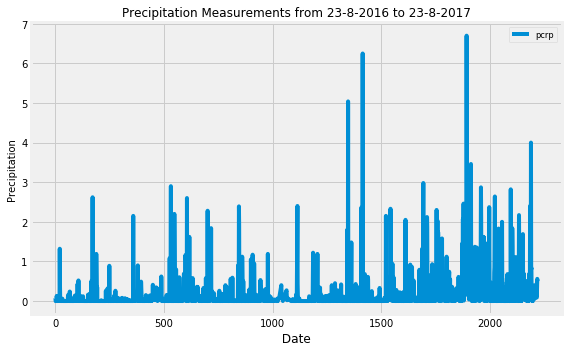

In [15]:
#Plot the results using the DataFrame `plot` method

ppt_df.plot(use_index=True, y='prcp', figsize=(8,5))
#plt.gcf().subplots_adjust(bottom=0.15)
plt.title("Precipitation Measurements from 23-8-2016 to 23-8-2017", fontsize='12')
plt.xlabel(" Date ")
#plt.xticks("")
#plt. 
plt.ylabel("Precipitation", size=10)
#plt.yticks(size=7)
#plt.xticks( rotation=45, size=7)
plt.legend(["pcrp"],loc=1, fontsize='small')
plt.tight_layout()
plt.savefig('precip_amount.png')
plt.show()

In [16]:
#Use Pandas to print the summary statistics for the precipitation data.

ppt_summary=ppt_df.describe()
ppt_summary

,prcp,precipitation
count,2011.000000,2011.000000
mean,0.176549,17.654898
std,0.460667,46.066708
min,0.000000,0.000000
25%,0.000000,0.000000
50%,0.020000,2.000000
75%,0.130000,13.000000
max,6.700000,670.000000


In [17]:
# Design a query to show how many stations are available in this dataset?
#pptscore = session.query(Measurement.date,Measurement.prcp).filter(Measurement.date>vacation_start).filter(Measurement.date<vacation_end).all()
# Station num from station table
StationNum = session.query(Station.station).count()
#station number from measurement table
StationNumfromMeasurement= session.query(Measurement.station).distinct(Measurement.station).count()
StationNumfromMeasurement

9

In [18]:
# What are the most active stations? (i.e. what stations have the most rows)?
# List the stations and the counts in descending order.
active_stations=session.query(Measurement.station,func.count(Measurement.station)).group_by(Measurement.station)\
.order_by(func.count(Measurement.station).desc()).all()
active_stations

[('USC00519281', 2772),
 ('USC00519397', 2724),
 ('USC00513117', 2709),
 ('USC00519523', 2669),
 ('USC00516128', 2612),
 ('USC00514830', 2202),
 ('USC00511918', 1979),
 ('USC00517948', 1372),
 ('USC00518838', 511)]

In [19]:
# Using the station id from the previous query, calculate the lowest temperature recorded, 
# highest temperature recorded, and average temperature most active station?



In [27]:
# Using the station id from the previous query, calculate the lowest temperature recorded, 
# highest temperature recorded, and average temperature most active station?
Min_temperature= session.query(Measurement.station,\
func.min(Measurement.tobs))\
.filter(Measurement.station == "USC00519281").all()

Max_temperature= session.query(Measurement.station,\
func.max(Measurement.tobs))\
.filter(Measurement.station == "USC00519281").all()

Avg_temperature= session.query(Measurement.station,\
func.avg(Measurement.tobs))\
.filter(Measurement.station == "USC00519281").all()
                    
print(Min_temperature[0][1], Max_temperature[0][1], Avg_temperature[0][1])

#print(Min_temperature[0][1])



54.0 85.0 71.66378066378067


In [56]:
# Choose the station with the highest number of temperature observations.
# Query the last 12 months of temperature observation data for this station and plot the results as a histogram
tobs_observations =  session.query(Measurement.station, Measurement.tobs).filter(Measurement.date.between('2016-08-23', '2017-08-23')).filter(Measurement.station == "USC00519281").all()

tobs_observations

#conver the result into data frame

temp = pd.DataFrame(tobs_observations)
temp.head()

,station,tobs
0,USC00519281,77.0
1,USC00519281,77.0
2,USC00519281,80.0
3,USC00519281,80.0
4,USC00519281,75.0


Text(0,0.5,'Frequency')

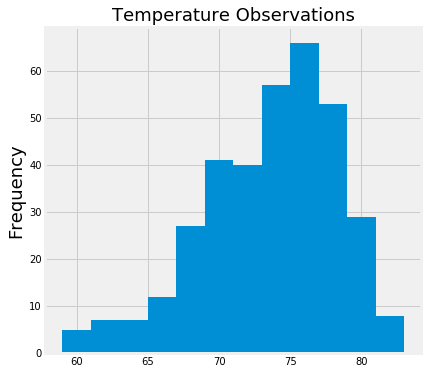

In [57]:
temp_plot = temp['tobs'].hist(bins=12, figsize =(6,6))
temp_plot.set_title('Temperature Observations', fontsize = 18)
temp_plot.set_ylabel('Frequency', fontsize =18)

In [58]:
# This function called `calc_temps` will accept start date and end date in the format '%Y-%m-%d' 
# and return the minimum, average, and maximum temperatures for that range of dates
def calc_temps(start_date, end_date):
    
    
    
    """TMIN, TAVG, and TMAX for a list of dates.
    
    Args:
        start_date (string): A date string in the format %Y-%m-%d
        end_date (string): A date string in the format %Y-%m-%d
        
    Returns:
        TMIN, TAVE, and TMAX
    """
    
    return session.query(func.min(Measurement.tobs), func.avg(Measurement.tobs), func.max(Measurement.tobs)).\
        filter(Measurement.date >= start_date).filter(Measurement.date <= end_date).all()

# function usage example
print(calc_temps('2012-02-28', '2012-03-05'))

[(62.0, 69.57142857142857, 74.0)]


In [59]:
# Use your previous function `calc_temps` to calculate the tmin, tavg, and tmax 
tmin,tavg,tmax = calc_temps("2016-08-23", "2016-08-23")[0]
# for your trip using the previous year's data for those same dates.
print(tmin,tavg,tmax)

74.0 78.28571428571429 81.0


Text(0.5,0,'Trip Avg Temp')

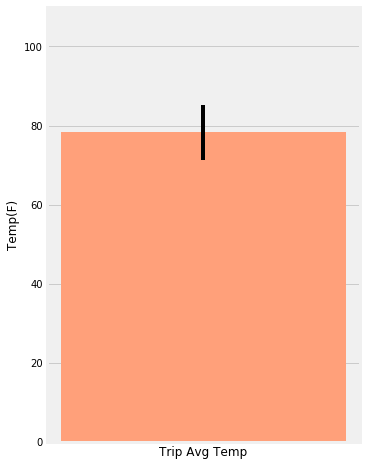

In [83]:
# Plot the results from your previous query as a bar chart. 
# Use "Trip Avg Temp" as your Title
# Use the average temperature for the y value
# Use the peak-to-peak (tmax-tmin) value as the y error bar (yerr)

plt.figure(figsize =(5,8))
barwidth = 0.5

plt.bar(1,tavg,color= "lightsalmon", yerr = tmax-tmin, width =10, align = "center" )
plt.ylim(0,110)
plt.xticks([])

plt.ylabel("Temp(F)")
plt.xlabel("Trip Avg Temp")
#plt.tight_layout()
#plt.xticks(" ")

In [105]:
# Calculate the rainfall per weather station for your trip dates using the previous year's matching dates.
# Sort this in descending order by precipitation amount and list the station, name, latitude, longitude, and elevation
start_date= "2016-08-23"
end_date= "2017-08-23"
rainfall = session.query(Station.station, Station.name,Station.latitude, Station.longitude, \
          Station.elevation,func.count(Measurement.prcp)).filter(Station.station == Measurement.station).\
            group_by(Measurement.station).filter(Measurement.date.between(start_date, end_date)).\
            order_by(func.count(Measurement.prcp).desc()).all()

rainfall

[('USC00519397', 'WAIKIKI 717.2, HI US', 21.2716, -157.8168, 3.0, 359),
 ('USC00519281',
  'WAIHEE 837.5, HI US',
  21.45167,
  -157.84888999999998,
  32.9,
  352),
 ('USC00513117', 'KANEOHE 838.1, HI US', 21.4234, -157.8015, 14.6, 343),
 ('USC00516128',
  'MANOA LYON ARBO 785.2, HI US',
  21.3331,
  -157.8025,
  152.4,
  328),
 ('USC00519523',
  'WAIMANALO EXPERIMENTAL FARM, HI US',
  21.33556,
  -157.71139,
  19.5,
  314),
 ('USC00514830',
  'KUALOA RANCH HEADQUARTERS 886.9, HI US',
  21.5213,
  -157.8374,
  7.0,
  265),
 ('USC00517948', 'PEARL CITY, HI US', 21.3934, -157.9751, 11.9, 60)]

## Optional Challenge Assignment

In [106]:
# Create a query that will calculate the daily normals 
# (i.e. the averages for tmin, tmax, and tavg for all historic data matching a specific month and day)

def daily_normals(date):
    """Daily Normals.
    
    Args:
        date (str): A date string in the format '%m-%d'
        
    Returns:
        A list of tuples containing the daily normals, tmin, tavg, and tmax
    
    """
    
    sel = [func.min(Measurement.tobs), func.avg(Measurement.tobs), func.max(Measurement.tobs)]
    return session.query(*sel).filter(func.strftime("%m-%d", Measurement.date) == date).all()
    
daily_normals("01-01")



[(62.0, 69.15384615384616, 77.0)]

SyntaxError: unexpected EOF while parsing (<ipython-input-35-bc7f61dd5318>, line 6)

In [21]:
# calculate the daily normals for your trip
# push each tuple of calculations into a list called `normals`

# Set the start and end date of the trip

# Use the start and end date to create a range of dates

# Stip off the year and save a list of %m-%d strings

# Loop through the list of %m-%d strings and calculate the normals for each date


[(62.0, 69.15384615384616, 77.0),
 (60.0, 69.39622641509433, 77.0),
 (62.0, 68.9090909090909, 77.0),
 (58.0, 70.0, 76.0),
 (56.0, 67.96428571428571, 76.0),
 (61.0, 68.96491228070175, 76.0),
 (57.0, 68.54385964912281, 76.0)]

In [22]:
# Load the previous query results into a Pandas DataFrame and add the `trip_dates` range as the `date` index


,tmin,tavg,tmax
date,,,
2018-01-01,62.0,69.153846,77.0
2018-01-02,60.0,69.396226,77.0
2018-01-03,62.0,68.909091,77.0
2018-01-04,58.0,70.000000,76.0
2018-01-05,56.0,67.964286,76.0


<IPython.core.display.Javascript object>


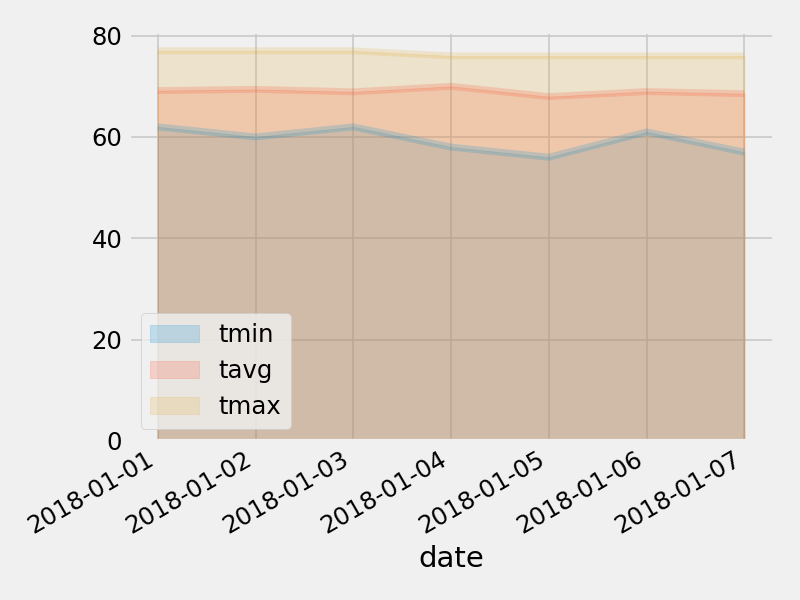

In [23]:
# Plot the daily normals as an area plot with `stacked=False`
